# **Project Name**    - Exploratory Data Analysis of Amazon Prime Content Dataset
### **Author**    - Sumanth K


# **Project Summary -**
To analyze Amazon Prime titles and identify the key factors influencing content popularity, audience ratings, and engagement patterns using statistical analysis and visualization techniques.

# **GitHub Link -**

[My Project_link](https://github.com/sumanth776/EDA_Amazon/blob/main/EDA_Amazon.ipynb)

# **Problem Statement**


 Explore and analyse the data to discover key factors responsible for app engagement and success.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import necessary Libraries

#For numerical analysis
import pandas as pd
import numpy as np

#For DataViz
import seaborn as sns
import matplotlib.pyplot as plt



#### Dataset Loading

In [ ]:
#loading the credits data
credits_data=pd.read_csv('https://raw.githubusercontent.com/sumanth776/EDA_Amazon/main/credits.csv')


In [ ]:
#loading the titles data
titles_data=pd.read_csv("https://raw.githubusercontent.com/sumanth776/EDA_Amazon/refs/heads/main/titles.csv")


### Dataset First View

In [ ]:
# Fetching frist 3 elements
pd.set_option('display.max_columns',None) # Displys all columns
credits_data.head(3)


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR


In [ ]:
# Fetching frist 3 elements
pd.set_option('display.max_columns',None) # Displys all columns
titles_data.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("credits data's shape",credits_data.shape)
print("titles data shape",titles_data.shape)

credits data's shape (124235, 5)
titles data shape (9871, 15)


#### Duplicate Values

In [ ]:
#Dataset Duplicate Value Count
credits_data.duplicated().value_counts()


,count
False,124179
True,56


In [ ]:
titles_data.duplicated().value_counts()

,count
False,9868
True,3


In [ ]:
#Dropping all the duplicate values
credits_data.drop_duplicates(inplace=True)
titles_data.drop_duplicates(inplace=True)

In [ ]:
# Checking Duplicate Value Count
print(credits_data.duplicated().value_counts())
print(titles_data.duplicated().value_counts())

False    124179
Name: count, dtype: int64
False    9868
Name: count, dtype: int64


#### Checking Missing Values/ Values Count

In [ ]:
# Missing Values/Null Values Count.
credits_data.replace("null",np.nan,inplace=True)
credits_data.isnull().sum()

,0
person_id,0
id,0
name,0
character,16277
role,0


In [ ]:
titles_data.replace("null",np.nan,inplace=True)
titles_data.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6484
runtime,0
genres,0
production_countries,0
seasons,8511


####Chart 1- Bar Plot - Univariate

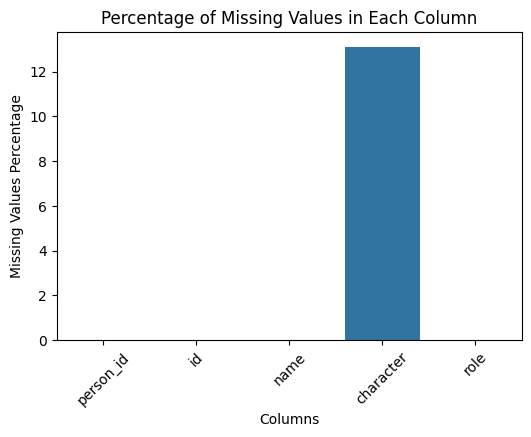

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_credits = ((credits_data.isnull().sum() / len(credits_data)) * 100).reset_index()
missing_percentage_credits.columns = ["Name","Missing_%"] # Renaming columns
# Plot the missing data percentages
plt.figure(figsize=(6, 4))
sns.barplot(data=missing_percentage_credits,x="Name",y="Missing_%")
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Missing Values Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Analyzing missing values helps assess data quality and completeness, which directly impacts the reliability of downstream analytics, recommendation systems, and business decision-making.

##### 2. What is/are the insight(s) found from the chart?

*   Analyzing missing values helps assess data quality and completeness, which directly impacts the reliability of downstream analytics, recommendation systems, and business decision-making.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifying columns with high missing data percentages helps to improve data quality, accuracy and user experience

####Chart 2- Bar Plot - Univariate

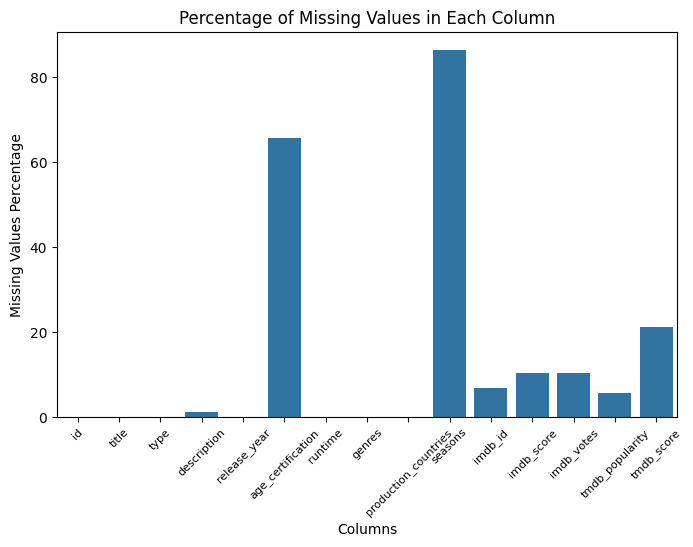

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_titles = ((titles_data.isnull().sum() / len(titles_data)) * 100).reset_index()
missing_percentage_titles.columns = ["Name","Missing_%"] # Renaming columns
# Plot the missing data percentages
plt.figure(figsize=(8, 5))
sns.barplot(data=missing_percentage_titles,x="Name",y="Missing_%")
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Missing Values Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45,fontsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

Analyzing missing values helps assess data quality and completeness, which directly impacts the reliability of downstream analytics, recommendation systems, and business decision-making.

##### 2. What is/are the insight(s) found from the chart?

*   Columns such as age certification and seasons contain more than 50% missing values, indicating incomplete metadata for a large portion of titles. Retaining these columns could introduce noise; therefore, removing them improves data consistency and analytical accuracy.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifying columns with high missing data percentages helps to improve data quality, accuracy and user experience

#### What did you know about your dataset?

I could see that the **Prime Dataset** has several values missing which are more than 50%, i will drop such column age_certification and seasons for better analysis to avoid skewing results.


### Chart -3 Heatmap - Multivarite


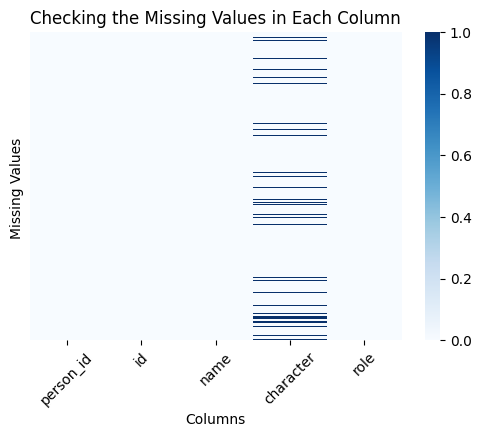

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(6, 4))
sns.heatmap(credits_data.isnull(),cbar=True,cmap='Blues',yticklabels=False)
plt.title('Checking the Missing Values in Each Column')
plt.ylabel('Missing Values ')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

*   I chose Heatmap to visualize missing values across the dataset because it provides a direct view of columns which have the most missing data and its distribution across the rows.



##### 2. What is/are the insight(s) found from the chart?

*   It shows that the data missing in columns like character.Which concludes that these missing data can be filled.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifying columns with high missing data helps to improve data quality, accuracy and user experience

####Chart 4- Heatmap - Multivarite


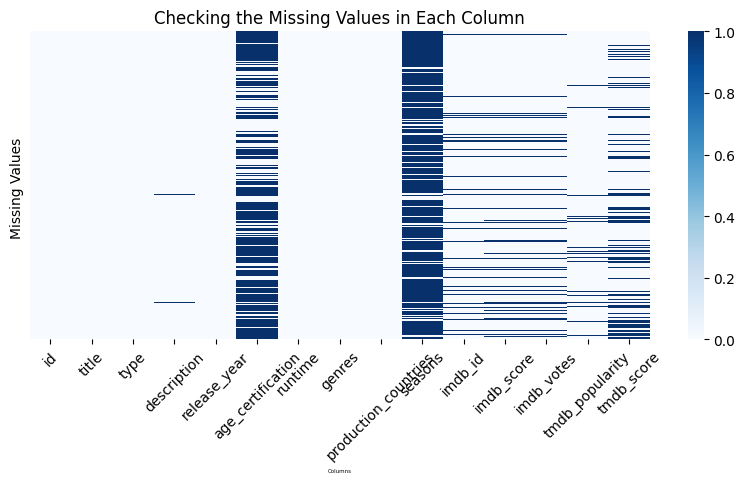

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 4))
sns.heatmap(titles_data.isnull(),cbar=True,cmap='Blues',yticklabels=False,edgecolor="black")
plt.title('Checking the Missing Values in Each Column')
plt.ylabel('Missing Values ')
plt.xlabel('Columns',fontsize=4)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

*   I chose Heatmap to visualize missing values across the dataset because it provides an direct view of columns which have the most missing data and its distribution across the rows.



##### 2. What is/are the insight(s) found from the chart?

*   It shows that the high missing values in columns like age_certifiacation and seasons columns.
* In many columns like description and imdb_id to tmdb_score there is a data missing which indicates stright lines in the heatmap
* Which concludes that these misssing data can be filled or dropped accordingly with more than 50% missing .


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifying columns with high missing data helps to improve data quality, accuracy and user experience

#### What did you know about your dataset?

I could see that the **Prime Dataset** has several values missing, i will fill such column for better analysis to avoid skewing results.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
credits_data.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [ ]:
# Dataset Columns
titles_data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [ ]:
#Views the summary information of a DataFrame
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124179 non-null  int64 
 1   id         124179 non-null  object
 2   name       124179 non-null  object
 3   character  107902 non-null  object
 4   role       124179 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
#Views the summary information of a DataFrame
titles_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9868 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

In [ ]:
# Describe shows all the statical data in all the numerical columns in the data sheet
credits_data.describe()

,person_id
count,1.241790e+05
mean,4.065843e+05
std,5.617204e+05
min,1.000000e+00
25%,3.898850e+04
50%,1.339490e+05
75%,5.712810e+05
max,2.371153e+06


In [ ]:
# Describe shows all the statical data in all the numerical columns in the data sheet
titles_data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9868.000000,9868.000000,1357.000000,8847.000000,8.837000e+03,9321.000000,7788.000000
mean,2001.345561,85.979124,2.791452,5.976534,8.536485e+03,6.912168,5.984117
std,25.792295,33.515714,4.148958,1.344028,4.592768e+04,30.008727,1.518040
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1996.000000,65.000000,1.000000,5.100000,1.180000e+02,1.234000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.640000e+02,2.537000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.237000e+03,5.640000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

* in Amazon prime Datasheet we see that all data types are in proper format, which helps further analysis of the dataset.

##  ***3. Data Wrangling***

# Column Descriptions

- **person_id**: Unique identifier for each person.
- **id**: Unique id of each shows/movies.
- **name**: Name of each actor/director.
- **character**: Character name of each person in shows/movies.
- **role**: Role with respect to shows/movies as actor/director.
- **title**: Titles of each shows/movies.
- **type**: Types wheather it belongs to movies or shows.
- **description**: Description of each shows/movies.
- **release_year**: Release year of each shows/movies.
- **age_certification**: ratings are a system for advising viewers on the age-appropriateness of content
- **runtime**: Runtime of each shows/movies.
- **genres**: Genre of each shows/movies 'comedy', 'family', 'animation', 'action', 'fantasy', 'horror
- **production_countries**: Countries names of shows/movies producton
- **seasons**: Seasons of shows
- **imdb_id**: An IMDb ID is a unique alphanumeric identifier for a movie or TV show in the Internet Movie Database (IMDb).
- **imdb_score**: imdb score for each movies/shows
- **imdb_votes**: imdb votes count for each movies/shows
- **tmdb_popularity**:TMDB popularity is a measure of a movie's lifetime popularity on The Movie Database (TMDB)
- **tmdb_score**:TMDB score is its average rating, similar to the IMDb score

### Handling Missing Values

In [ ]:
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124179 non-null  int64 
 1   id         124179 non-null  object
 2   name       124179 non-null  object
 3   character  107902 non-null  object
 4   role       124179 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
titles_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9868 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

##### This colclude that all data types of variables are correct in Amazon prime Datasheet

## Mergeing the Dataset both credits and titles
 - Both titles and credits data have same common key = "id"
 - The shape of titles_data is row = 9868 columns = 15 and credits_data row = 124179 columns = 5
 - Used left join instead of inner because left keeps all the titles even no credits are listed but in inner join the titles would drop,Since we want to analyze all titles (and enrich them with credits when available), left is safer.

In [ ]:
# Both tite
prime_data = titles_data.merge(credits_data,on="id",how="left")
print(titles_data.shape)
print(credits_data.shape)
print(prime_data.shape)


(9868, 15)
(124179, 5)
(125186, 19)


### Dropping the Coloums and Filling the Missing Values
- In column seasons and age_certification the missing data is more than 50% so these two column should be dropped for cleaner data

### Filling the Missing Values

In [ ]:
# Checking the % of missing data
prime_data_missing = ((prime_data.isnull().sum() / len(prime_data)) * 100).reset_index()
prime_data_missing.columns = ["column","Missing_percentage"] # For index columns
# sorting the values for better understanding
print(prime_data_missing.sort_values(by="Missing_percentage",ascending=False).head(10))

               column  Missing_percentage
9             seasons           93.209305
5   age_certification           54.581982
17          character           13.806656
14         tmdb_score            8.782931
12         imdb_votes            5.109996
11         imdb_score            5.086032
10            imdb_id            4.294410
18               role            0.804403
15          person_id            0.804403
16               name            0.804403


- Filling the missing values in columns
* **character** - Filling with "Unknown" (safe, avoids data loss).
* **tmdb_score** - Either we can fill with NaN or fill with mean/median method but filling values with mean/median is mathematically fine but ethically questionable, because so it introduces artificial ratings it shows under rated movies/shows that were never actually given by users, so the best approch is filling with **""NaN""**, but here the problem is while excuting the univarite it show NaN as **str**, so it better to add the **new columns** with a missing flag.
* **imdb_votes** - This rating can be filled with **0**.
* **imdb_score** - Either we can fill with NaN or fill with mean/median method but filling values with mean/median is mathematically fine but ethically questionable, because so it introduces artificial ratings it shows under rated movies/shows that were never actually given by users, so the best approch is filling with **""NaN""**, but here the problem is while excuting the univarite it show NaN as **str**, so it better to add the **new columns** with a missing flag.
* **imdb_id** - Filling with "Unknown".


In [ ]:
  # Dropping the duplicates in prime DataSet
  prime_data = prime_data.drop_duplicates()
  prime_data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [ ]:
# Checking the value input in both columns
print(prime_data["imdb_score"].isnull().sum())
print(prime_data["tmdb_score"].isnull().sum())

6367
10995


In [ ]:
def clean_prime_data(x):
    print(f"Before cleaning: {x.shape}")  # Show shape before cleaning

    # Drop columns with high missing value % ("seasons", "age_certification")
    drop_col = ["seasons", "age_certification"]
    x = x.drop(columns=drop_col, errors="ignore")
    print(f"After dropping columns: {x.shape}")  # Show shape after dropping columns

    # Fill missing values
    x["character"] = x["character"].fillna("Unknown")
    x["imdb_votes"] = x["imdb_votes"].fillna(0)
    x["imdb_id"] = x["imdb_id"].fillna("Unknown")
    print(f"After filling missing values: {x.shape}")  # Show shape after filling

    # Create missing flags
    x["tmdb_missing"] = x["tmdb_score"].isna().astype(int)
    x["imdb_missing"] = x["imdb_score"].isna().astype(int)
    print(f"After creating missing flags: {x.shape}")  # Show shape after adding flags

    # Reset index
    x = x.reset_index(drop=True)
    print(f"After resetting index: {x.shape}")  # Show shape after resetting index

    return x

prime_data_cleaned = clean_prime_data(prime_data)


Before cleaning: (125186, 19)
After dropping columns: (125186, 17)
After filling missing values: (125186, 17)
After creating missing flags: (125186, 19)
After resetting index: (125186, 19)


In [ ]:
# Checking the value input in both columns
print(prime_data_cleaned["imdb_score"].isnull().sum())
print(prime_data_cleaned["tmdb_score"].isnull().sum())
print(prime_data_cleaned["imdb_missing"].unique())
print(prime_data_cleaned["tmdb_missing"].unique())

print(prime_data_cleaned["imdb_missing"].sum())
print(prime_data_cleaned["tmdb_missing"].sum())

6367
10995
[0 1]
[0 1]
6367
10995


In [ ]:
# Checking the % of missing data after correction
prime_data_missing = ((prime_data_cleaned.isnull().sum() / len(prime_data)) * 100).reset_index()
prime_data_missing.columns = ["column","Missing_percentage"] # For index columns
# sorting the values for better understanding
print(prime_data_missing.sort_values(by="Missing_percentage",ascending=False).head(10))

             column  Missing_percentage
12       tmdb_score            8.782931
9        imdb_score            5.086032
13        person_id            0.804403
16             role            0.804403
14             name            0.804403
11  tmdb_popularity            0.442541
3       description            0.152573
2              type            0.000000
1             title            0.000000
0                id            0.000000


In [ ]:
prime_data_cleaned.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'person_id', 'name', 'character',
       'role', 'tmdb_missing', 'imdb_missing'],
      dtype='object')

####Chart 5- HistPlot - Univariate

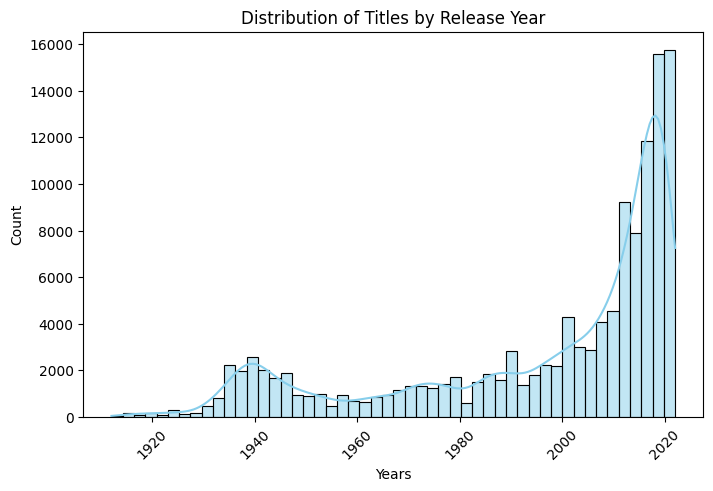

In [ ]:
# HistPlot
plt.figure(figsize=(8, 5))
sns.histplot(prime_data_cleaned["release_year"],kde=True,bins=50,color="skyblue")
plt.title("Distribution of Titles by Release Year")
plt.ylabel("Count")
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram (HistPlot) because it is best suited to show the frequency distribution of titles over chronological data (years). It helps identify periods of growth or decline in content production.



##### 2. What is/are the insight(s) found from the chart?

*  Most titles(Movies/shows) were released in a year b/w 2000 to 2020, and its showing the strong growth in the streaming era.
* Very few titles(Movies/shows) were released in a year 1960 and almost none in a year 1920.
* The distribution is left-skewed, indicating most content is recent

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Understanding growth trends helps to see content demand for future trends.


#### What did you know about your dataset?

The dataset shows runtime distributionclear growth trends over the years, validating Prime’s focus on modern content.


####Chart 6- HistPlot - Univariate

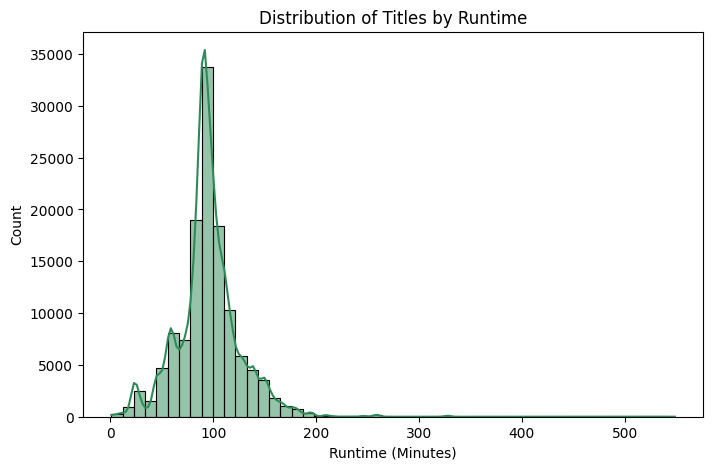

In [ ]:
# HistPlot
plt.figure(figsize=(8, 5))
sns.histplot(prime_data_cleaned["runtime"], kde=True, bins=50, color="seagreen")
plt.title("Distribution of Titles by Runtime")
plt.ylabel("Count")
plt.xlabel("Runtime (Minutes)")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram because it best shows the distribution of continuous numerical values like runtime. It helps identify the identify the range for content and spot outliers.



##### 2. What is/are the insight(s) found from the chart?

* Most titles have a runtime between 80 and 120 minutes, representing the standard duration preferred for audience engagement and completion rates.
* Extremely short or long runtimes are rare, suggesting that streaming platforms optimize content length to balance viewer retention and storytelling depth.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Understanding growth trends helps to see content demand for future trends.


#### What did you know about your dataset?

The data sheet confirms that the **Amazon Prime_Dataset** has that the trends over the years ,This validates Prime’s strategy of prioritizing modern content while offering relatively fewer classics..

### Handling Outliers

In [ ]:
check_num = prime_data_cleaned.select_dtypes(include=["int64","float64"]).columns
check_num

Index(['release_year', 'runtime', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'person_id', 'tmdb_missing',
       'imdb_missing'],
      dtype='object')

| Column               | Outlier Handling Decision | Reason                                                           |
| -------------------- | ------------------------- | ---------------------------------------------------------------- |
| **release\_year**    | Ignore outliers           | Years follow a fixed range (not meaningful to drop).             |
| **runtime**          | Check & remove outliers ✅  | Movies/shows with extreme runtimes (too short/long) are invalid. |
| **imdb\_score**      | Ignore outliers           | Scores are bounded (1–10). Outliers are not meaningful.          |
| **imdb\_votes**      | Remove outliers✅          | Very high vote counts can skew analysis.                         |
| **tmdb\_popularity** | remove outliers✅  | Popularity metric can be extremely skewed.                       |
| **tmdb\_score**      | Remove outliers✅          | Scores can have extreme outliers.                                |
| **person\_id**       | Ignore outliers           | Just IDs, not a measure.                                         |
| **tmdb\_missing**    | Ignore                    | Missing flags (binary 0/1).                                      |
| **imdb\_missing**    | Ignore                    | Missing flags (binary 0/1).                                      |


* **Remove outliers for:** ['runtime', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

####Chart 7- BoxPlot - Univariate

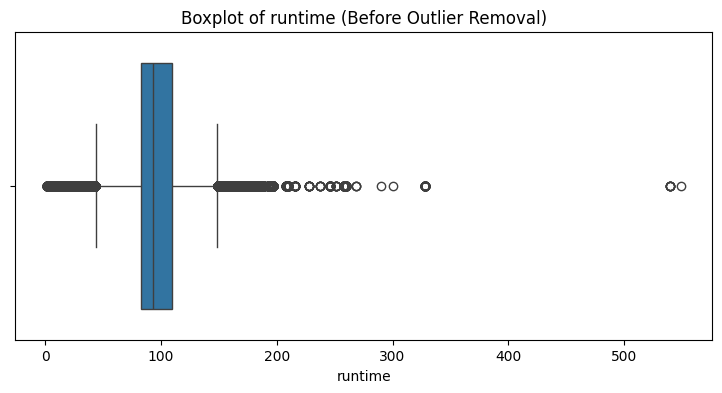

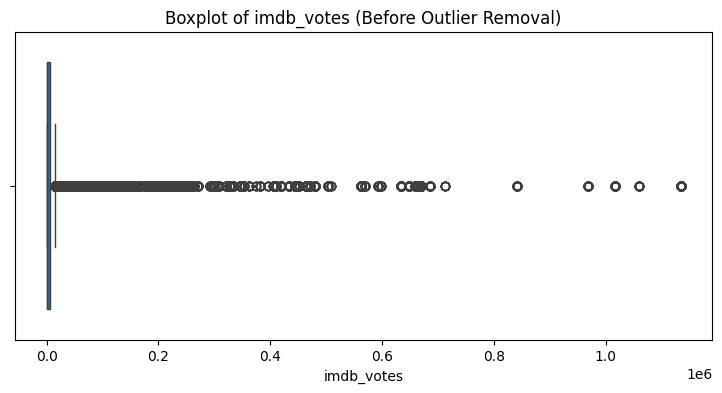

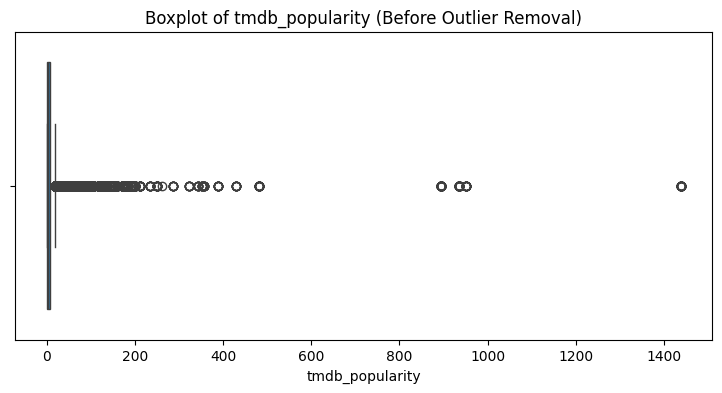

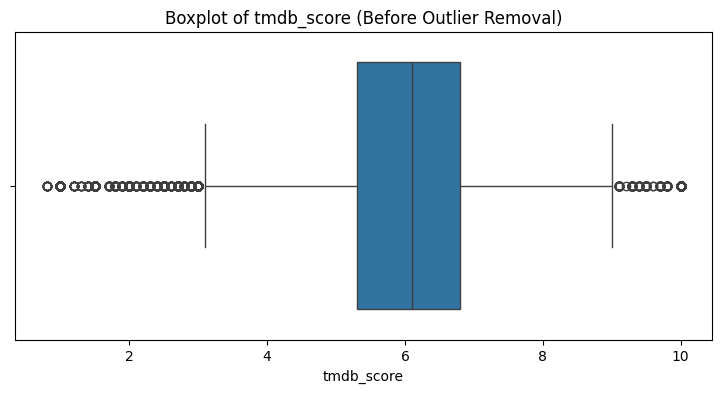

In [ ]:
# Columns to filter for checking outliers
col_filter = ['runtime', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

for col in col_filter:
    plt.figure(figsize=(9,4))
    sns.boxplot(x=prime_data_cleaned[col])
    plt.title(f"Boxplot of {col} (Before Outlier Removal)")
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a Boxplot because it best shows the Outlier data for the following, It helps identify the outlier shows center line and beyond or extreme values also to spot outliers.



##### 2. What is/are the insight(s) found from the chart?

- **Runtime**: Shows extreme values.

- **IMDb Votes**: Highly skewed — a few movies with millions of votes vs. most with very few.

- **TMDB Popularity**: Skewed distribution — most movies have low popularity, but blockbusters show up as extreme outliers.

- **TMDB Score**: Most ratings cluster around the middle (5–8), but outliers exist near the extremes.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Removing outliers improves data accuracy and makes analysis more reliable, leading to better business decisions and clearer insights.

Negative Impact: However, outliers may represent rare but valuable opportunities or emerging trends. Removing them without proper evaluation could result in missed insights and potential revenue loss.

#### What did you know about your dataset?

This validates Prime’s strategy of prioritizing modern content while offering relatively fewer classics..

Removing Outliers by IQR Method

In [ ]:
def removing_out_IQR(x, col):
  Q1 = x[col].quantile(0.25)
  Q3 = x[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bond = Q1 - 1.5 * IQR
  upper_bond = Q3 + 1.5 * IQR
  return x[(x[col]>= lower_bond)&(x[col]<=upper_bond)]
# Appling the function for each col
for i in col_filter:
  prime_data_cleaned = removing_out_IQR(prime_data_cleaned, i)


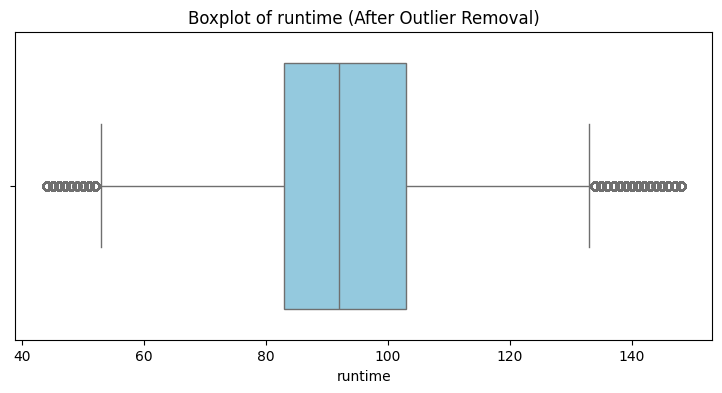

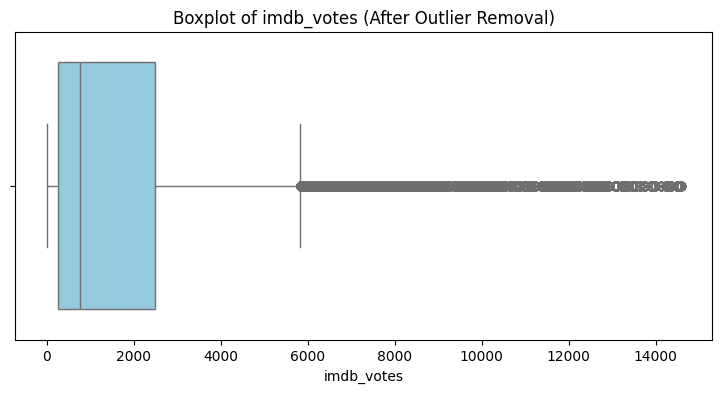

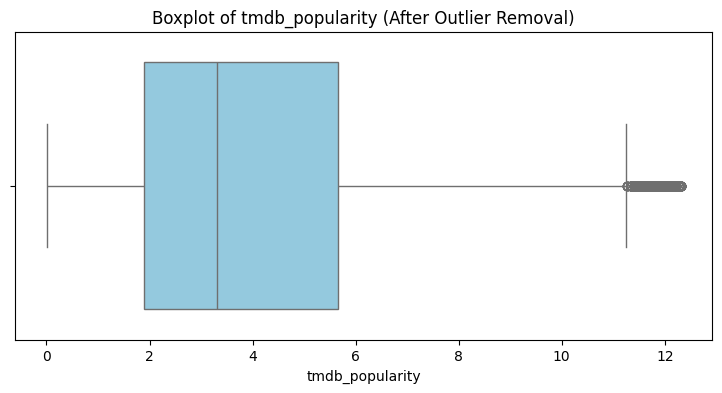

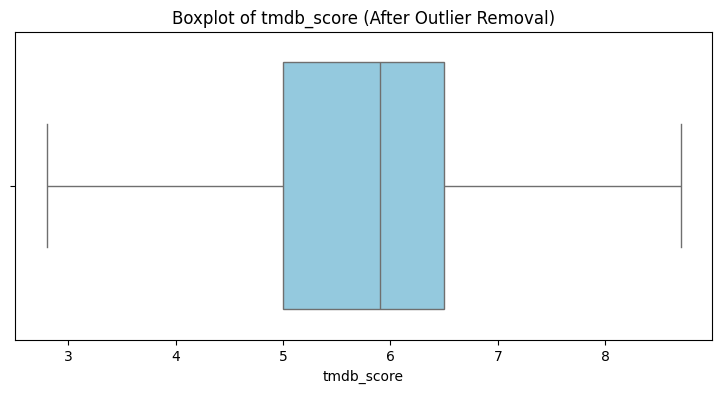

In [ ]:
for col in col_filter:
    plt.figure(figsize=(9,4))
    sns.boxplot(x=prime_data_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col} (After Outlier Removal)")
    plt.xlabel(col)
    plt.show()

* Outliers were evaluated using the Interquartile Range (IQR) method for numerical features such as runtime, IMDb votes, TMDB popularity, and TMDB score.
* Removing extreme values helps prevent skewed statistical interpretations, while acknowledging that some outliers may represent high-impact blockbuster titles.
* Therefore, outlier handling was applied cautiously to maintain analytical balance between accuracy and real-world variability.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart 8- BarPlot - Bivariate Analysis

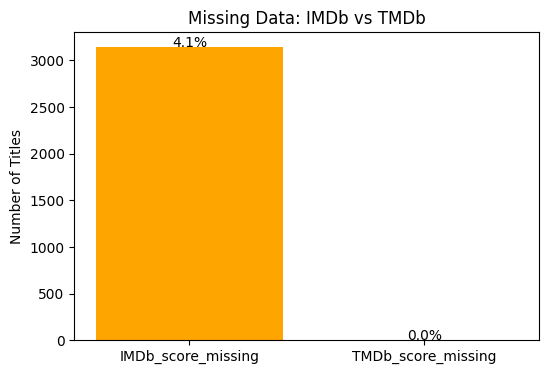

In [ ]:
# Missing data
total_titles = len(prime_data_cleaned)
missing_counts= {"IMDb_score_missing":prime_data_cleaned["imdb_missing"].sum(),
                 "TMDb_score_missing":prime_data_cleaned["tmdb_missing"].sum()}
missing_percent = {k:(v/total_titles)*100 for k,v in missing_counts.items()}
plt.figure(figsize=(6,4))
plt.bar(missing_counts.keys(), missing_counts.values(), color=["orange","blue"])
# Add percentage labels above bars
for i, (key, value) in enumerate(missing_counts.items()):
    plt.text(i, value, f"{missing_percent[key]:.1f}%",ha="center")


plt.title("Missing Data: IMDb vs TMDb")
plt.ylabel("Number of Titles")
plt.show()


In [ ]:
Main = len(prime_data_cleaned)
i = prime_data_cleaned["imdb_missing"].sum()
m = prime_data_cleaned["tmdb_missing"].sum()
print(Main)
print(i)
print(m)
print((i/Main)*100)
print((m/Main)*100)

77116
3145
0
4.078271694589968
0.0


##### 1. Why did you pick the specific chart?

I chose a bargraph because it shows the comparison b/w the imdb_score and tmdb_score which shows the better coverage for better analysis of titles covered.

##### 2. What is/are the insight(s) found from the chart?

* TMDb ratings provide broader coverage than IMDb ratings.
* The distribution is left-skewed, indicating most content is recent.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

It shows the better coverage to analysis data

#### What did you know about your dataset?

The data sheet confirms that the TMDb score has 100% comparing to IMDb data.

####Chart 9- Bar Plot - Bivariate
*   Let us look at Average IMDb Rating by Genre .

In [ ]:
# Split multiple genres into separate rows
#Copy dataset
genre_exploded = prime_data_cleaned.copy()

# Remove brackets and quotes
genre_exploded["genres"] = genre_exploded["genres"].str.replace(r"[\[\]']", "", regex=True)
# Split multiple genres by comma
genre_exploded["genres"] = genre_exploded["genres"].str.split(",\s*")

# Explode into seprate rows
genre_exploded = genre_exploded.explode("genres")

# groupby
avg_rating_genere = (genre_exploded.groupby("genres")["imdb_score"].mean().sort_values(ascending=False))

# Divideing the plots in 2 top 10 and botton 10
top10 = avg_rating_genere.head(10)
bottom10 = avg_rating_genere.tail(10)
print(top10.head(3))
print(bottom10.head(3))

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1222541870.py:8: SyntaxWarning: invalid escape sequence '\s'
  genre_exploded["genres"] = genre_exploded["genres"].str.split(",\s*")


genres
documentation    6.970719
reality          6.514912
history          6.481759
Name: imdb_score, dtype: float64
genres
romance    5.919578
crime      5.841231
western    5.769760
Name: imdb_score, dtype: float64


/tmp/ipython-input-1050532408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values,y=top10.index,ax=axes[0],palette="Greens_r")
/tmp/ipython-input-1050532408.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom10.values,y=bottom10.index,ax=axes[1],palette="Reds")


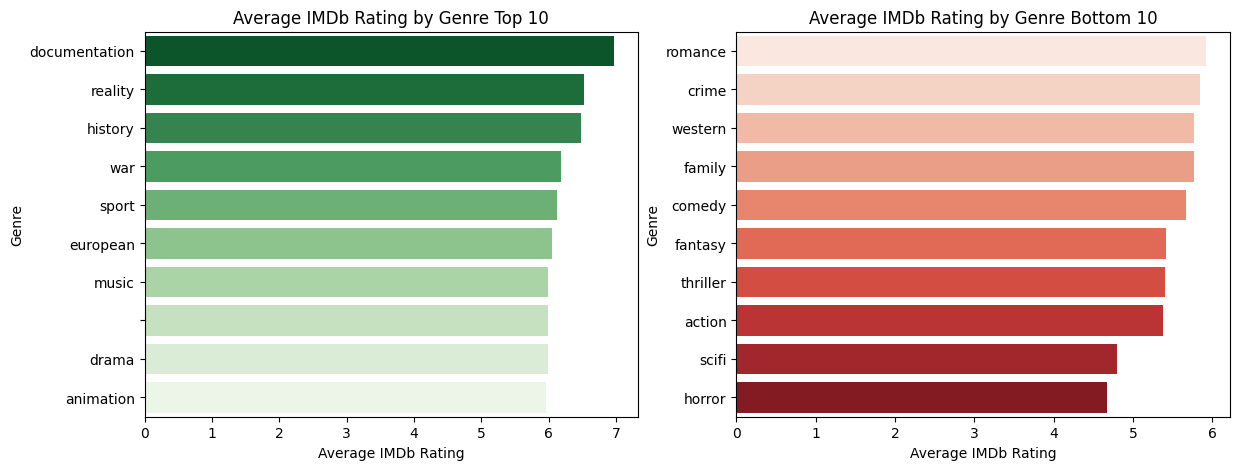

In [ ]:
# BarPlot

fig, axes = plt.subplots(1,2,figsize=(14,5))

#Tpo10
sns.barplot(x=top10.values,y=top10.index,ax=axes[0],palette="Greens_r")
axes[0].set_title("Average IMDb Rating by Genre Top 10")
axes[0].set_xlabel("Average IMDb Rating")
axes[0].set_ylabel("Genre")

#Bottom5j

sns.barplot(x=bottom10.values,y=bottom10.index,ax=axes[1],palette="Reds")
axes[1].set_title("Average IMDb Rating by Genre Bottom 10")
axes[1].set_xlabel("Average IMDb Rating")
axes[1].set_ylabel("Genre")


plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal barplot because it compares average ratings across genres, making it easy to identify top-performing and bottom-performing content as per the categories.




##### 2. What is/are the insight(s) found from the chart?

* Documentation, Reality genres generally show higher average ratings.
* Horror genres shows they have moderate ratings.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Platforms should invest more in high-rated genres to improve perceived content quality.
* Ignoring low-rated genres may risk audience dissatisfaction and churn.


#### What did you know about your dataset?

The data sheet confirms that the **Amazon Prime_Dataset** has that the trends over diffrent Genres ,This validates Prime’s strategy of prioritizing modern content while offering best classics Genres.

#### Chart 10 Piechart : Univariate Analysis
*   Let us look at the percentage of Movies Vs Shows.

In [ ]:
prime_data_cleaned["type"].unique()

array(['MOVIE', 'SHOW'], dtype=object)

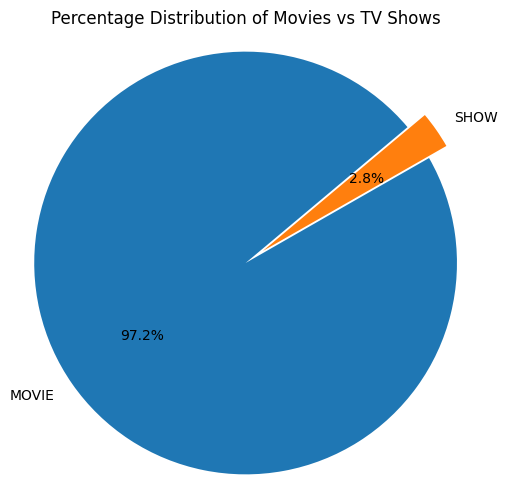

In [ ]:
# Count values
type_counts = prime_data_cleaned["type"].value_counts()

# PieChart
explode = [0,0.1]

plt.figure(figsize=(6, 6))
plt.pie(type_counts,labels=type_counts.index,autopct="%0.1f%%",
        startangle=40,explode=explode)
plt.title("Percentage Distribution of Movies vs TV Shows")
plt.axis("equal")  # keeps circle shape
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Pie Chart because it best shows the proportional distribution of between movies and T.V Shows making it easy to compare their relative share on the platform.



##### 2. What is/are the insight(s) found from the chart?

* One content type (typically movies) forms the majority of titles.

* TV shows represent a smaller but significant portion, indicating growing focus on long-form engagement content.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Movies help in quick user acquisition and content variety.

* TV shows contribute to longer watch time and subscriber retention.

* A balanced investment between both formats is essential for sustained platform growth.

#### What did you know about your dataset?

Because the objective was to compare proportions of categorical content types, and pie charts provide the most intuitive representation for percentage distribution.

#### Chart 11 - Scatterplot : Bivariate Analysis (Continuous)
*   Let us see if frequently updated apps tend to have better ratings.




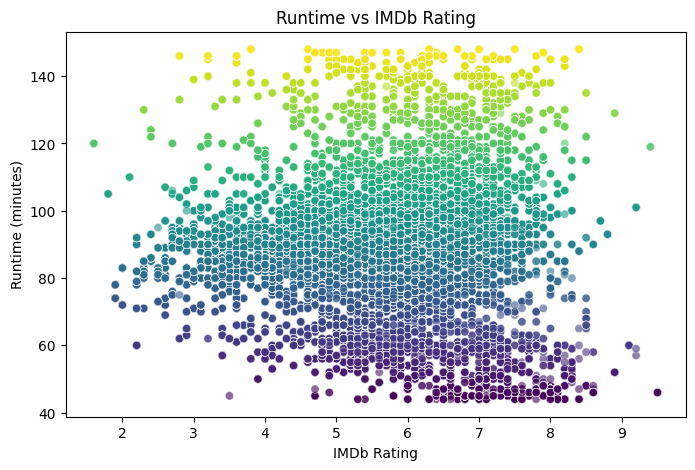

In [ ]:
# ScatterPlot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=prime_data_cleaned,y="runtime",x="imdb_score",hue="runtime",alpha=0.6,palette="viridis",legend=False)
plt.title("Runtime vs IMDb Rating")
plt.ylabel("Runtime (minutes)")
plt.xlabel("IMDb Rating")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot because it helps analyze the relationship between runtime and audience rating. It helps identify correlation patterns, clusters.

##### 2. What is/are the insight(s) found from the chart?

*  This visualization indicates no strong linear correlation between runtime and IMDb rating.
* Most titles cluster within the 80–120 minute range, representing the common runtime window.
* The short or long runtimes shows greater rating variability.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Understanding runtime distribution aids content planning and scheduling decisions.


#### What did you know about your dataset?

The scatter plot shows no strong correlation between runtime and IMDb rating, indicating that longer or shorter content does not guarantee higher audience satisfaction.

#### Chart 12 - Histplot : Bivariate Analysis
*   Let us see distribution of Rumtime.




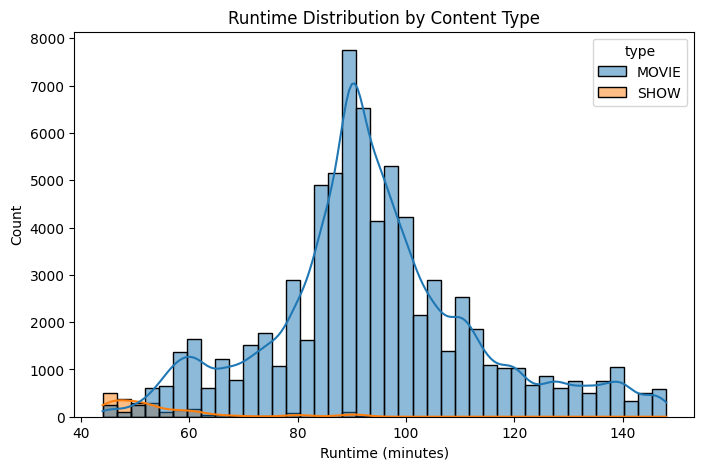

In [ ]:
# ScatterPlot
plt.figure(figsize=(8,5))
sns.histplot(data=prime_data_cleaned, x="runtime", hue="type", bins=40, kde=True)
plt.title("Runtime Distribution by Content Type")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram because runtime is a continuous numerical variable, and histograms are ideal for visualizing distribution patterns.

##### 2. What is/are the insight(s) found from the chart?

The majority of titles fall within the 80–120 minute range, indicating a standardized runtime format for most movies. This suggests that streaming platforms likely optimize content duration to align with viewer engagement and completion behavior.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Understanding growth trends helps to see content demand for future trends.


#### What did you know about your dataset?

The dataset reflects a strong concentration of modern content with standardized runtime patterns.

#### Chart 13 - Line Chart : Bivariate Analysis
*   Let us see Tend analysis.




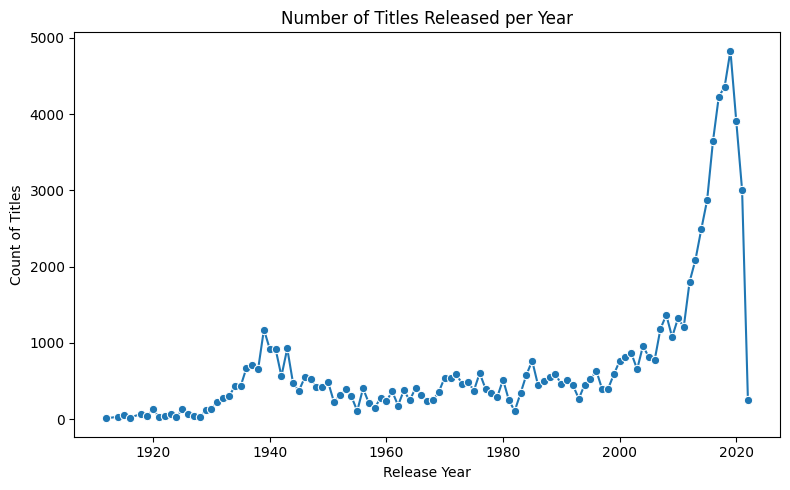

In [ ]:
# Count the titles released per year
titles_per_year = (prime_data_cleaned["release_year"].value_counts().sort_index())

# Line Chart
plt.figure(figsize=(8, 5))
sns.lineplot(x=titles_per_year.index,y=titles_per_year.values,marker="o")
plt.title("Number of Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Line Chart this is most suitable for time-based-data as it clearly shows trends, growth patterns.

##### 2. What is/are the insight(s) found from the chart?

*  The trend shows there were very less titles before 1990s
* The steady increase begins after 2000, followed by a sharp surge after 2015, indicates the rapid rise of OTT platform and the demand for digital content.
* The decline around 2020 also influenced by global production pause due to Covid-19 pandemic, which temporarily slowed films and shows.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

The trend shows strong long-term growth in streaming content, supporting continued investment in digital media.

Negative insight:
Temporary production slowdowns (e.g., COVID-19 impact) highlight the need for risk-resilient content pipelines.

#### What did you know about your dataset?

The Line chart shows the historical evolution of streaming content production and rapid expansion in the modern OTT era, overall it indicated the industry growth potential.

#### Chart 14 - WordCloud : Multivariate Analysis
*   Let us see on the production countries.




<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2546570043.py:10: SyntaxWarning: invalid escape sequence '\s'
  country_prime["production_countries"] = country_prime["production_countries"].str.split(",\s*")


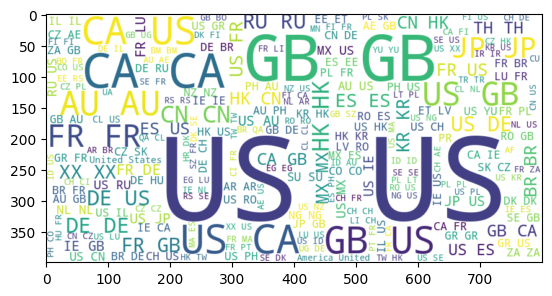

In [ ]:
from wordcloud import WordCloud

# Split multiple genres into separate rows
#Copy dataset
country_prime = prime_data_cleaned.copy()

# Remove brackets and quotes
country_prime["production_countries"] = country_prime["production_countries"].str.replace(r"[\[\]']", "", regex=True)
# Split multiple genres by comma
country_prime["production_countries"] = country_prime["production_countries"].str.split(",\s*")

# Explode into seprate rows
country_prime = country_prime.explode("production_countries")
country_prime["production_countries"].unique()

# Combine all countries into single text
text = " ".join(country_prime["production_countries"].dropna().astype(str))
text

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")



##### 1. Why did you pick the specific chart?

A WordCloud is effective for visualizing the frequency distribution of categorical text data such as production countries.It provides quick overview of which countries dominate content production.

##### 2. What is/are the insight(s) found from the chart?

* Countries like  the United States (US), Great Britain (GB/UK), and Canada (CA) appear most primary contributors to the content catalog.

* Several other countries appear with moderate frequency, showing partial global diversity in production.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive impact:

Helps identify dominant production markets for strategic future investment and supports regional expansion and localization strategies for global audience growth.

* Potential negative insight:

Only few countries dominate may reduce cultural diversity and audience inclusivity.

#### What did you know about your dataset?

The dataset reveals a strong geographical concentration of content production, with a few major countries contributing most titles.
This confirms the dataset is well suited for analyzing global content strategy, regional imbalance, and expansion opportunities in streaming platforms.

#### Chart 15 - HeatMap : Multivariate Analysis


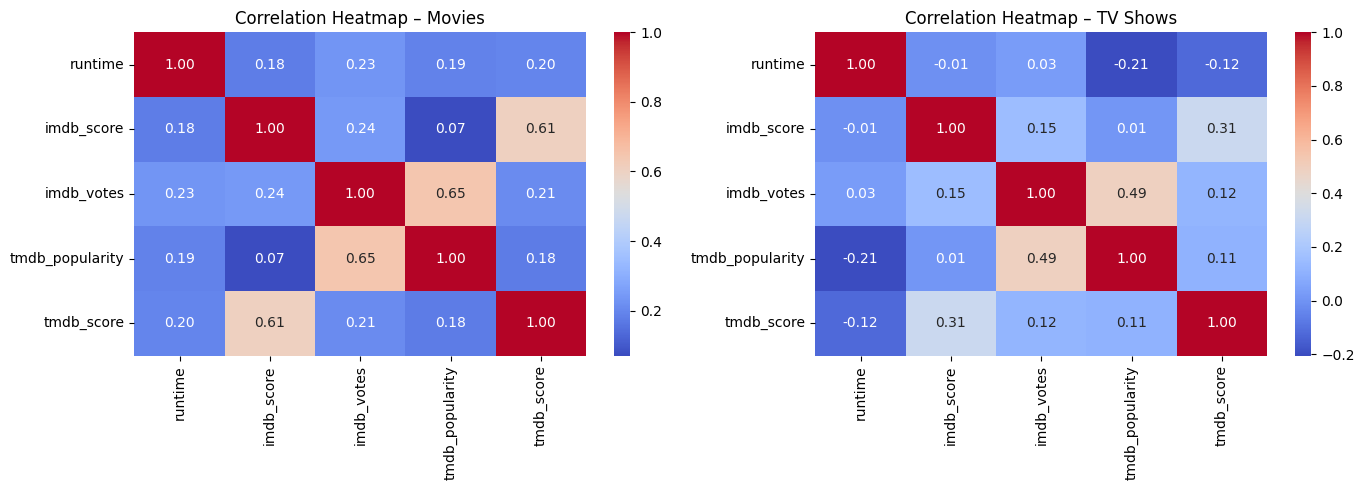

In [ ]:
#Chossing the aproite columns
Imp_col = ["runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]

# Create separate datasets
movies = prime_data_cleaned[prime_data_cleaned["type"] == "MOVIE"][Imp_col]
shows = prime_data_cleaned[prime_data_cleaned["type"] == "SHOW"][Imp_col]

# Plot heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(movies.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap – Movies")

sns.heatmap(shows.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap – TV Shows")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was used to compare the relationships between key numerical variables separately for Movies and TV Shows in a single clear view.

##### 2. What is/are the insight(s) found from the chart?

Movies:

* IMDb votes and TMDB popularity show a strong positive relationship.

* IMDb and TMDB scores are highly consistent.

* Runtime has weak influence on ratings and popularity.

TV Shows:

* Votes and popularity are positively related but weaker than movies.

* Rating agreement is moderate, showing variability across seasons.

* Runtime has minimal impact on success.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive impact:

Shows that Movies and TV Shows follow different engagement patterns, helping improve recommendation strategy and content investment decisions.

* Potential negative insight:

Variability in TV-show ratings may indicate inconsistent quality across seasons, which can affect viewer retention.

#### What did you know about your dataset?

Engagement and popularity are closely connected, especially for movies and rating platforms are generally consistent but differ by content type.

#### Chart 16 - Boxplot : Bivariate Analysis
*   Let us see Movies vs Shows Performance




/tmp/ipython-input-1115172726.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prime_data_cleaned,x="type",y="imdb_score",palette="Set2")


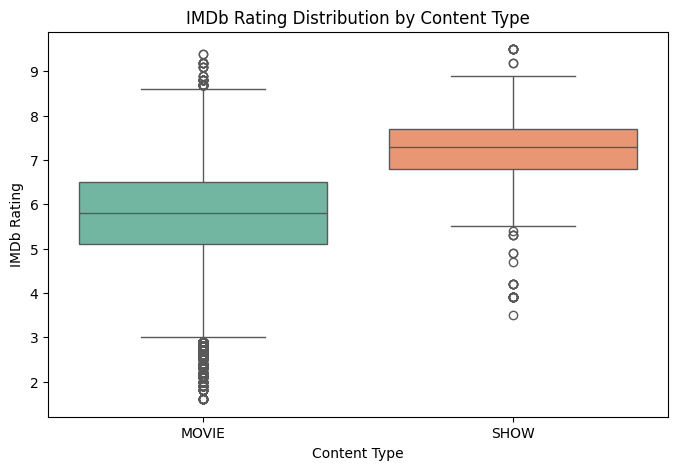

In [ ]:
# BoxPlot

plt.figure(figsize=(8, 5))
sns.boxplot(data=prime_data_cleaned,x="type",y="imdb_score",palette="Set2")
plt.title("IMDb Rating Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("IMDb Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing the distribution of numerical values across categories.It reveals the median rating, spread, variability, and presence of outliers for Movies vs TV Shows, enabling clear performance comparison.

##### 2. What is/are the insight(s) found from the chart?

* TV Shows demonstrate a higher median IMDb rating and more concentrated distribution compared to Movies, indicating stronger viewer engagement and sustained storytelling quality.
* Movies exhibit greater variability and more low-rating outliers, suggesting inconsistent audience reception.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Positive:
Investing in high-quality episodic content may improve viewer retention, subscription longevity, and platform engagement.

#### What did you know about your dataset?

This analysis reveals that the dataset contains distinct rating behavior between Movies and TV Shows, where Series generally achieve stronger audience approval than Movies. This confirms the dataset is suitable for content strategy evaluation, recommendation modeling, and engagement analysis.

#### Chart 17 - Scatterplot : Bivariate Analysis

*   Let us see Success Relationship Analysis.



/tmp/ipython-input-236618000.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=prime_data_cleaned,x="tmdb_popularity",y="imdb_score",alpha=0.6,palette="viridis")


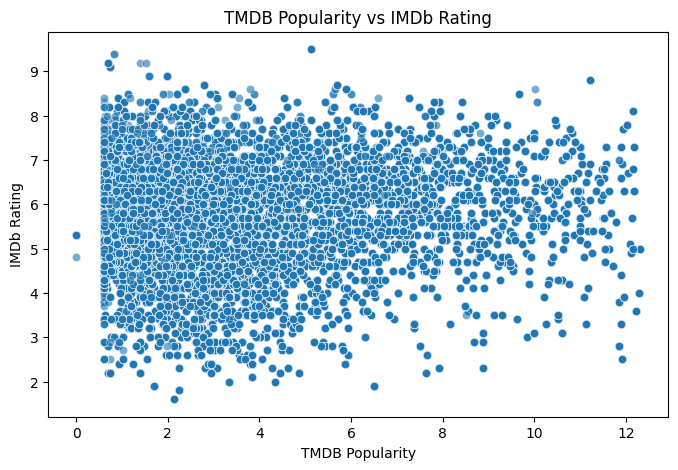

In [ ]:
# ScatterPlot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=prime_data_cleaned,x="tmdb_popularity",y="imdb_score",alpha=0.6,palette="viridis")
plt.title("TMDB Popularity vs IMDb Rating")
plt.xlabel("TMDB Popularity")
plt.ylabel("IMDb Rating")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot ideal for examining the relationship between two continuous numerical variables—here, audience rating (quality) and popularity (engagement/trend).

##### 2. What is/are the insight(s) found from the chart?

* The points are widely scattered, indicating a weak overall correlation between popularity and rating.

* Many titles with low popularity still achieve high ratings, suggesting the presence of hidden gems.

* Some high-popularity titles have only moderate ratings, indicating marketing or hype does not always equal quality.

* Most content clusters around ratings 5–7 with low-to-medium popularity, representing the typical catalog performance range.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Helps identify high-quality but under-popular titles that can be promoted to increase engagement.Supports recommendation systems by combining quality and popularity metrics.

Potential negative insight:

Weak correlation means popularity alone cannot predict quality, making content success harder to forecast.

#### What did you know about your dataset?

The weak correlation between TMDB popularity and IMDb rating indicates that high visibility does not necessarily reflect high audience satisfaction.
This highlights the presence of:

Hidden gems → highly rated but under-promoted titles

Over-hyped content → popular but moderately rated titles

#### Chart 18 - BarPlot : Bivariate Analysis


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2512212963.py:4: SyntaxWarning: invalid escape sequence '\s'
  country_df["production_countries"] = (country_df["production_countries"].str.replace(r"[\[\]']", "", regex=True).str.split(",\s*"))
/tmp/ipython-input-2512212963.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.values,y=top_country.index,palette="viridis")


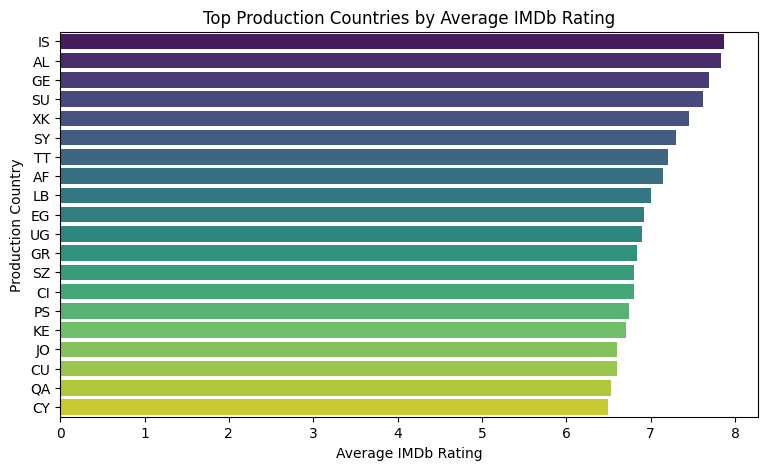

In [ ]:
# Creating the dataset
country_df = prime_data_cleaned.copy()

country_df["production_countries"] = (country_df["production_countries"].str.replace(r"[\[\]']", "", regex=True).str.split(",\s*"))

country_df = country_df.explode("production_countries")

# Average rating by country
top_country = (country_df.groupby("production_countries")["imdb_score"].mean().sort_values(ascending=False).head(20))

# Plot
plt.figure(figsize=(9, 5))

sns.barplot(x=top_country.values,y=top_country.index,palette="viridis")

plt.title("Top Production Countries by Average IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Production Country")

plt.show()



#Countries
IS: Iceland

AL: Albania
GE: Georgia
SU: Soviet Union (Historical code)
XK: Kosovo (User-assigned code)
SY: Syrian Arab Republic (Syria)
TT: Trinidad and Tobago
AF: Afghanistan
LB: Lebanon
EG: Egypt

##### 1. Why did you pick the specific chart?

A horizontal barplot is ideal for comparing average numerical performance across categories, such as IMDb ratings across production countries.

##### 2. What is/are the insight(s) found from the chart?

* Certain countries achieve consistently high average IMDb ratings (around 7–8), indicating strong quality and intact storytelling.

* The difference between top countries is relatively small, suggesting comparable quality among leading regions.

* Some of the top-rated countries may have lower production volume, meaning quality over quantity in those regions even better than US and UK.

* This highlights geographical diversity in high-quality content creation.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Helps streaming platforms identify high-quality production regions for strategic partnerships and encourages diverse global storytelling, improving audience reach and satisfaction.

Potential negative insight:

High ratings from low-volume countries may not scale easily for mass content production.

#### What did you know about your dataset?

This analysis shows the dataset contains geographically diverse content quality, where High ratings are not limited to a single dominant country and production quality varies independently from production volume.

#### Chart 19 - Boxplot : Bivariate Analysis
*   Let us see IMDb Rating Distribution by Release Period.




/tmp/ipython-input-1958788772.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prime_data_cleaned,x="release_period",y="imdb_score",palette="Set3")


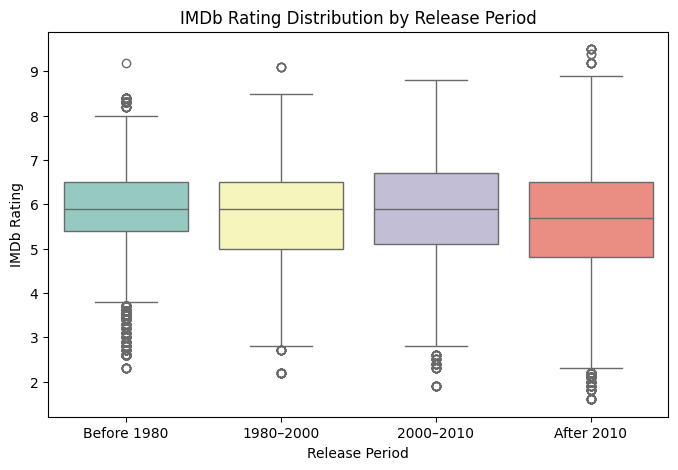

In [ ]:
from PIL.Image import Palette
# Create release period bins
prime_data_cleaned["release_period"] = pd.cut(prime_data_cleaned["release_year"],bins=[1900, 1980, 2000, 2010, 2025],
                                              labels=["Before 1980", "1980–2000", "2000–2010", "After 2010"])
# BoxPlot
plt.figure(figsize=(8, 5))
sns.boxplot(data=prime_data_cleaned,x="release_period",y="imdb_score",palette="Set3")
plt.title("IMDb Rating Distribution by Release Period")
plt.xlabel("Release Period")
plt.ylabel("IMDb Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing the distribution of ratings across different time periods, as it clearly shows the median, spread, variability, and outliers for each release era.

##### 2. What is/are the insight(s) found from the chart?

* The median IMDb rating remains relatively stable across all release periods, generally around the mid-to-high 5 range, indicates consistent average quality over time.

* Older content (before 1980) shows slightly tighter distribution, suggesting more consistent ratings among classic titles.

* Recent content (after 2010) displays wider variability and more low-rating outliers, indicating greater diversity in quality with the rise of large-scale streaming production.

* High-rating outliers exist in all eras, showing that exceptional content is produced in every time period.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Stable median ratings suggest overall platform content quality is maintained across decades.

Potential negative insight:

Increased variability and more low-rating recent titles may indicate quantity growth affecting average quality perception.

#### What did you know about your dataset?

This analysis shows that the dataset contains multi-decade content with relatively stable average ratings, where Classic content remains consistently rated. This confirms the dataset is suitable for trend analysis, recommendation modeling, and strategic catalog planning.

#### Chart 20 - Pair Plot : Multivariate Analysis


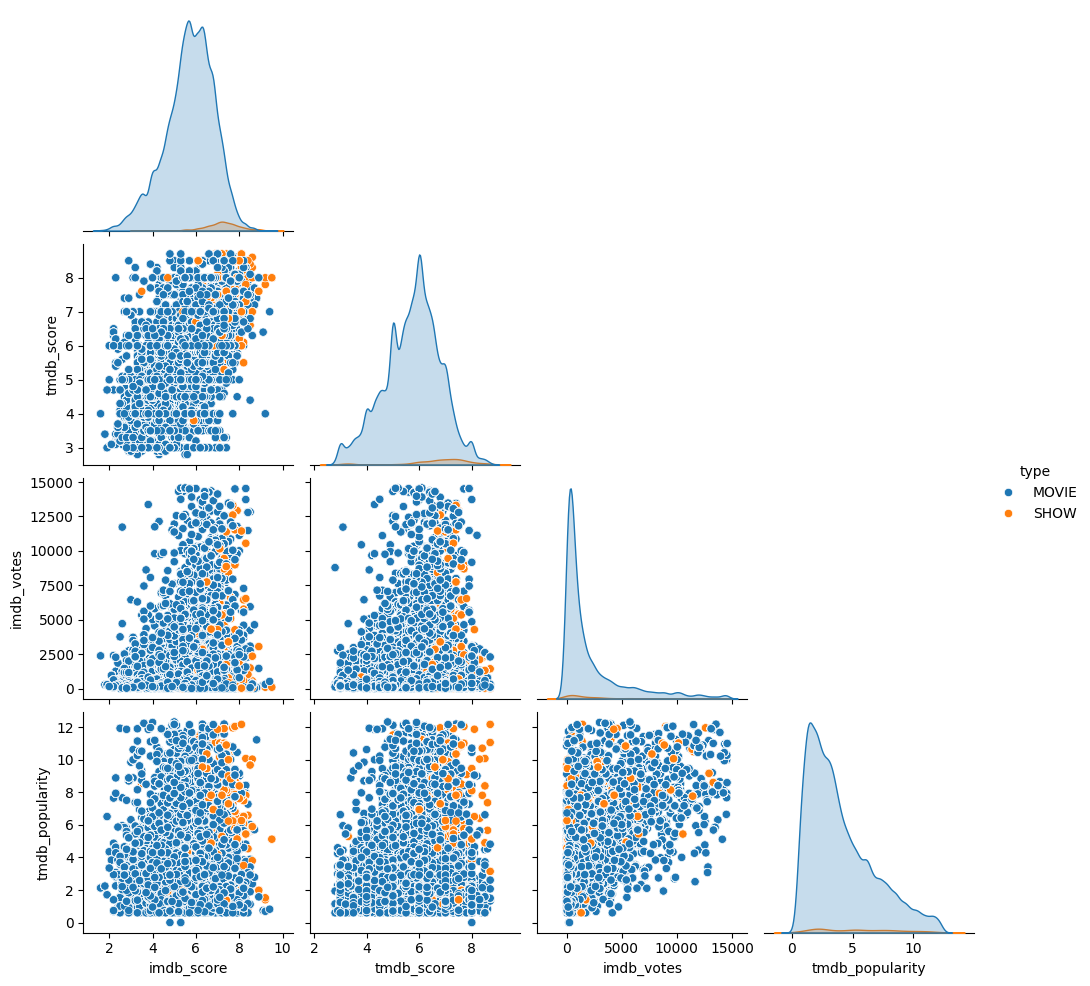

<Figure size 600x700 with 0 Axes>

In [ ]:
# Select important numerical columns
pair_df = prime_data_cleaned[ ["imdb_score", "tmdb_score", "imdb_votes", "tmdb_popularity", "type"]].dropna()

# Pair plot
sns.pairplot(pair_df,hue="type",diag_kind="kde",corner=True) # color Movie vs Show\

plt.figure(figsize=(6, 7))

plt.suptitle("Pair Plot of Key Numerical Features by Content Type", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is used to visualize pairwise relationships and individual distributions among the most important numerical variables—ratings, votes, and popularity—while also comparing Movies vs TV Shows using color encoding.

##### 2. What is/are the insight(s) found from the chart?

* IMDb score and TMDB score show a strong positive correlation, confirming rating consistency across platforms.

* IMDb votes and TMDB popularity are positively related, indicating that higher audience engagement leads to higher visibility/trending.

* Distributions are right-skewed for votes and popularity, meaning few titles receive extremely high attention while most remain moderately engaged.

* Movies and TV Shows largely overlap in rating and engagement space, though TV Shows appear slightly concentrated at higher rating ranges, suggesting strong viewer retention for episodic content.

* No single feature alone perfectly predicts success, implying content performance is multifactorial.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Identifies key predictive variables (ratings, votes, popularity) useful for recommendation systems. Highlights engagement concentration, guiding promotion toward high-potential titles.



#### What did you know about your dataset?

This visualization confirms the dataset contains there Consistent multi-platform rating behavior, Overlapping performance between Movies and Shows,vNo single dominant predictor of success.

## ***5. Conclusion***

This exploratory data analysis of the Amazon Prime dataset reveals that:

* Audience ratings remain relatively stable across decades, though recent content shows greater variability in quality.

* Popularity and ratings are only weakly correlated, meaning visibility alone cannot predict audience satisfaction.

* Genre, content type, and engagement metrics significantly influence viewer perception and platform success.